In [ ]:
#load save model and test on images
#colorize_autoencoder300.model is trained on 2000 epochs

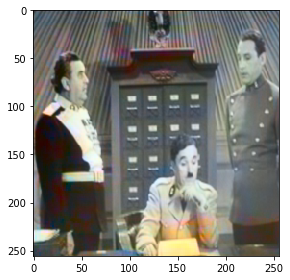

In [5]:
import tensorflow as tf
from keras.preprocessing.image import img_to_array, load_img
from skimage.transform import resize
from skimage.io import imsave, imshow
import numpy as np
from skimage.color import rgb2lab, lab2rgb
###########################################################
#Load saved model and test on images.
#colorize_autoencoder300.model is trained for 300 epochs
#

model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/colorize_autoencoder.model',
                                   custom_objects=None,
                                   compile=True)

img1_color=[]

img1=img_to_array(load_img('/content/drive/MyDrive/Colab Notebooks/Color_Images/all images/212300.jpg'))
img1 = resize(img1 ,(256,256))
img1_color.append(img1)

img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))

output1 = model.predict(img1_color, verbose = 0)
output1 = output1*128

result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
imshow(lab2rgb(result))
imsave("result.png", lab2rgb(result))